In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt 

In [17]:
path='/home/harshit/Desktop/ML_maths/Linear_Algebra/archive'

In [332]:
import os
import struct

def load_mnist_images(file_path):
    with open(file_path, 'rb') as f:
        _, num, rows, cols = struct.unpack('>IIII', f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num, rows, cols)
    return images

def load_mnist_labels(file_path):
    with open(file_path, 'rb') as f:
        _, num = struct.unpack('>II', f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
    return labels

train_images = load_mnist_images(os.path.join(path, 'train-images.idx3-ubyte'))
train_labels = load_mnist_labels(os.path.join(path, 'train-labels.idx1-ubyte'))
test_images = load_mnist_images(os.path.join(path, 't10k-images.idx3-ubyte'))
test_labels = load_mnist_labels(os.path.join(path, 't10k-labels.idx1-ubyte'))

In [333]:
train_images=train_images.reshape((60000,784))
test_images1=test_images
test_images=test_images.reshape((10000,784))

In [297]:
train_images=train_images[:5000]
train_labels=train_labels[:5000]
test_images=test_images[:500]
test_labels=test_labels[:500]

def one_hot_encode(labels):
    unique_ids= np.max(labels) +1
    one_hot_encoded= np.zeros((labels.shape[0],unique_ids))
    idx= np.arange(0,labels.shape[0])
    one_hot_encoded[idx,labels[idx]]=1
    return one_hot_encoded
y=one_hot_encode(train_labels)
y_test=one_hot_encode(test_labels)


In [260]:
train_images[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253,
       159,  50,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238,
       252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [298]:
lyr=[784,64,32,10]        # it defines the number of neurons in each layer
A = (train_images.T)/255
test=(test_images.T)/255
m=A.shape[1]
y=y.T
y_test=y_test

In [277]:

W1 = np.random.randn(lyr[1], lyr[0]) * np.sqrt(2/lyr[0])
W2 = np.random.randn(lyr[2], lyr[1]) * np.sqrt(2/lyr[1])
W3 = np.random.randn(lyr[3], lyr[2]) * np.sqrt(2/lyr[2])
b1 = np.random.randn(lyr[1], 1) * 0.01
b2 = np.random.randn(lyr[2], 1) * 0.01
b3 = np.random.randn(lyr[3], 1) * 0.01


In [278]:
def softmax(x):
    shifted_x = x - np.max(x, axis=0, keepdims=True)
    exp_vals = np.exp(shifted_x)
    return exp_vals / np.sum(exp_vals, axis=0, keepdims=True)
def relu(x):
    return (x>0)*x
def grad_relu(x):
    return x>0
# def softmax_2d(A):


In [279]:
def feedforward(A):
    z1= W1@A+b1
    A1=relu(z1)

    z2=W2@A1 +b2
    A2=relu(z2)

    z3=W3@A2 +b3
    A3= softmax(z3)
    cache={
        "A0": A,
        "A1": A1,
        "A2":A2
    }
    return A3,cache

In [322]:
def accuracy(y_pred,labels):
    out=np.argmax(y_pred,axis=0,keepdims=True)
    labels = labels.reshape(out.shape)
    n=labels.shape[1]
    # print(n)
    equal= labels==out
    count_equal= np.sum(equal)
    # print(count_equal)
    return count_equal/n


In [280]:
def cost_fn_old(y,y_pred):
    n = y.shape[1]
    # print(n)
    y=y.reshape((n,))
    y_pred=y_pred.reshape((n,))
    hehe=-np.sum((np.dot(y,np.log(y_pred)),np.dot(1-y,np.log(1-y_pred)) ))/n
    return hehe
def cost_fn(y,y_pred):
    n = y.shape[1]
    h=1e-10
    hehe=-np.sum(y*np.log(y_pred+h))/n    #y is 10000 columns vectors we want to add all rows for a column so axix =0
    return hehe

In [281]:
def backprop_3(A3,y,m,A2,W3):
    #dc_dz3 = dc_da3 .*da3_dz3 #(element wise multiplication)
    dc_dz3= 1/m *(A3-y)
    assert dc_dz3.shape == (lyr[3],m)
    dc_dw3= dc_dz3 @ (A2.T)
    assert dc_dw3.shape ==(lyr[3],lyr[2])
    dc_db3= np.sum(dc_dz3, axis=1, keepdims=True) /m    # because dc_db3 = dc_dz3 ka column sum
    assert dc_db3.shape ==(lyr[3],1)
    dc_da2= (W3.T) @ dc_dz3
    assert dc_da2.shape ==(lyr[2],m)
    return dc_dw3,dc_db3,dc_da2



In [282]:
def backprop_2(dc_da2,W2,A1,A2):
    da_dz2 = grad_relu(A2)
    assert da_dz2.shape == (lyr[2],m)
    dc_dz2= dc_da2 * da_dz2
    assert da_dz2.shape == (lyr[2],m)
    dc_dw2= dc_dz2 @ (A1.T)
    assert dc_dw2.shape ==(lyr[2],lyr[1])
    dc_db2=np.sum(dc_dz2, axis=1, keepdims=True) /m    # because dc_db2 = dc_dz2 ka column sum
    assert dc_db2.shape ==(lyr[2],1)
    dc_da1= (W2.T) @ dc_dz2
    assert dc_da1.shape ==(lyr[1],m)
    return dc_dw2,dc_db2,dc_da1


In [283]:
def backprop_1(dc_da1,W1,A0,A1):
    da_dz1 = grad_relu(A1)
    assert da_dz1.shape == (lyr[1],m)
    dc_dz1= dc_da1 * da_dz1
    assert da_dz1.shape == (lyr[1],m)
    dc_dW1= dc_dz1 @ (A0.T)
    assert dc_dW1.shape ==(lyr[1],lyr[0])
    dc_db1=np.sum(dc_dz1,axis=1,keepdims=True) /m    # because dc_db2 = dc_dz1 ka column sum
    assert dc_db1.shape ==(lyr[1],1)
    return dc_dW1,dc_db1



In [284]:
A3,cache=feedforward(A)
dc_dw3,dc_db3,dc_da2=backprop_3(A3,y,m,cache["A2"],W3)
dc_dw2,dc_db2,dc_da1=backprop_2(dc_da2,W2,cache["A1"],cache["A2"])
dc_dW1,dc_db1=backprop_1(dc_da1,W1,cache["A0"],cache["A1"])

In [285]:
cache

{'A0': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'A1': array([[ 0.07781524, -0.        , -0.        , ...,  0.19701467,
          0.19090418,  0.49422331],
        [ 0.07111352,  0.34580253,  0.2754341 , ...,  0.39828733,
         -0.        ,  0.70408672],
        [-0.        , -0.        , -0.        , ...,  0.23054208,
         -0.        ,  0.1431114 ],
        ...,
        [ 0.25768089,  0.37490764, -0.        , ...,  0.04183715,
          0.32336903, -0.        ],
        [-0.        , -0.        , -0.        , ..., -0.        ,
         -0.        , -0.        ],
        [ 0.80362807,  0.7674362 ,  0.62287692, ...,  0.20692058,
          0.49919407, -0.        ]]),
 'A2': array([[-0.        ,  0.0828619 , -0.        , ..., -0.        ,
          0.01968172, -0.        ],
    

In [286]:
A3

array([[0.10862002, 0.08948867, 0.13413601, ..., 0.06307165, 0.11261233,
        0.11789574],
       [0.13542584, 0.17950116, 0.13161234, ..., 0.06189248, 0.08838435,
        0.14109469],
       [0.08167194, 0.06225742, 0.08097335, ..., 0.08861106, 0.10369735,
        0.07923363],
       ...,
       [0.0888441 , 0.05215128, 0.09238042, ..., 0.05098485, 0.09347595,
        0.07794072],
       [0.13020552, 0.06465669, 0.10325531, ..., 0.06869681, 0.09437027,
        0.07897737],
       [0.10880359, 0.19460991, 0.06855931, ..., 0.23570357, 0.09717452,
        0.16043114]])

In [287]:
cost_fn(y,A3)

2.3937612556212624

In [323]:
def train():
    global W1,W2,W3,b1,b2,b3
    costs=[]
    epochs=1000
    alpha=0.01
    for i in range(epochs):
        A3,cache=feedforward(A)
        y_pred,_=feedforward(test)
        acc=accuracy(y_pred,test_labels)
        error= cost_fn(y,A3)
        costs.append(error)
        dc_dw3,dc_db3,dc_da2=backprop_3(A3,y,m,cache["A2"],W3)
        dc_dw2,dc_db2,dc_da1=backprop_2(dc_da2,W2,cache["A1"],cache["A2"])
        dc_dw1,dc_db1=backprop_1(dc_da1,W1,cache["A0"],cache["A1"])
        W3-= alpha*dc_dw3
        W2-= alpha*dc_dw2
        W1-= alpha*dc_dw1
        b3-= alpha*dc_db3
        b2-= alpha*dc_db2
        b1-= alpha*dc_db1

        if(i%20==0):
            print(f"epoch = {i} error ={error} accuracy={acc}");
    return costs

epoch = 0 error =2.2965238174281786 accuracy=0.096
epoch = 20 error =2.200555990855625 accuracy=0.18
epoch = 40 error =2.1093061047507606 accuracy=0.246
epoch = 60 error =2.011381543709273 accuracy=0.306
epoch = 80 error =1.900213310083607 accuracy=0.354
epoch = 100 error =1.7771002600123114 accuracy=0.414
epoch = 120 error =1.6467564059547974 accuracy=0.484
epoch = 140 error =1.516757286023437 accuracy=0.546
epoch = 160 error =1.3927649012969887 accuracy=0.612
epoch = 180 error =1.2776532016511795 accuracy=0.66
epoch = 200 error =1.1732176385907043 accuracy=0.71
epoch = 220 error =1.0808263371399842 accuracy=0.72
epoch = 240 error =1.000245439477429 accuracy=0.728
epoch = 260 error =0.9308317373876597 accuracy=0.726
epoch = 280 error =0.8709710592762545 accuracy=0.744
epoch = 300 error =0.8191046224164693 accuracy=0.754
epoch = 320 error =0.7738604478942706 accuracy=0.758
epoch = 340 error =0.7342692397568009 accuracy=0.77
epoch = 360 error =0.6997039523780514 accuracy=0.774
epoch = 3

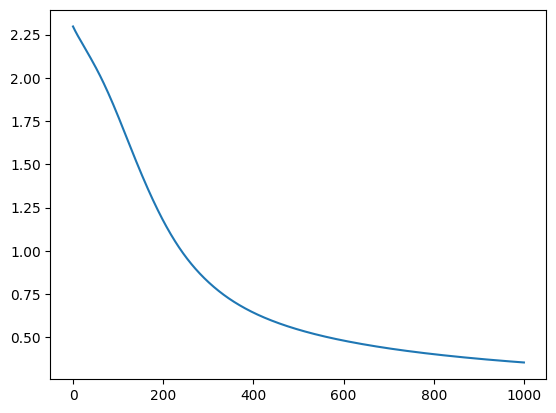

In [324]:
costs=train()
epochs=np.linspace(0,len(costs),len(costs))
plt.plot(epochs,costs)

In [326]:
y_pred,cache=feedforward(test)
out=np.argmax(y_pred,axis=0,keepdims=True)


In [339]:
out.shape

(1, 500)

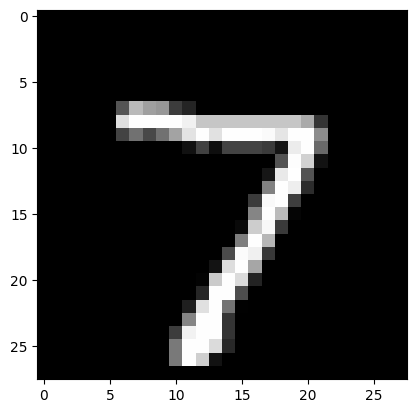

7


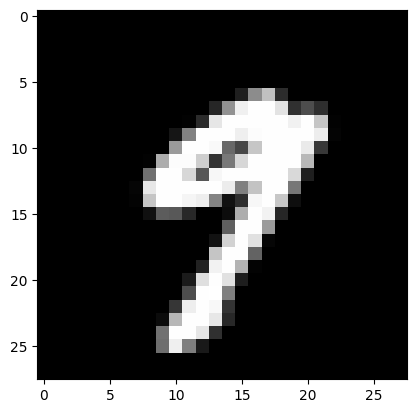

9


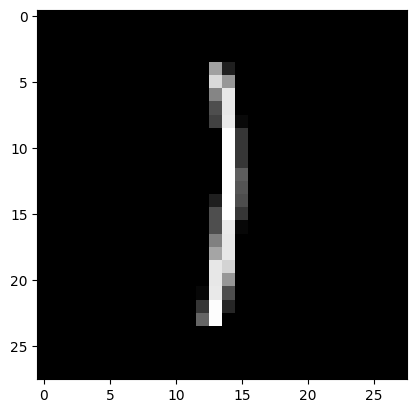

1


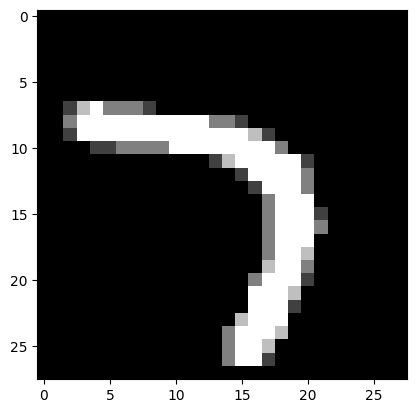

7


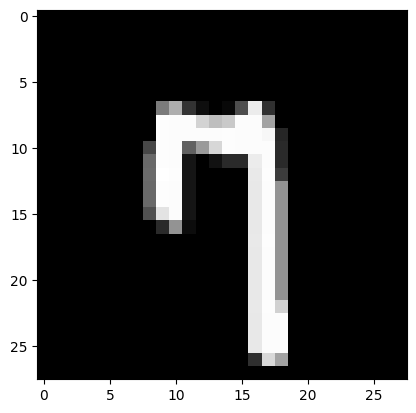

9


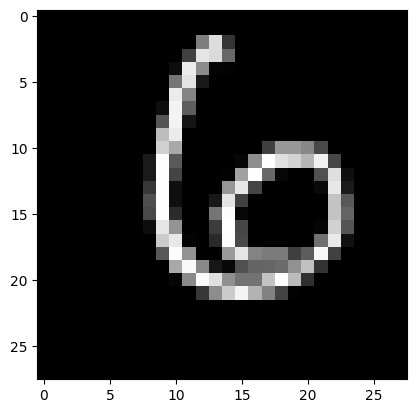

6


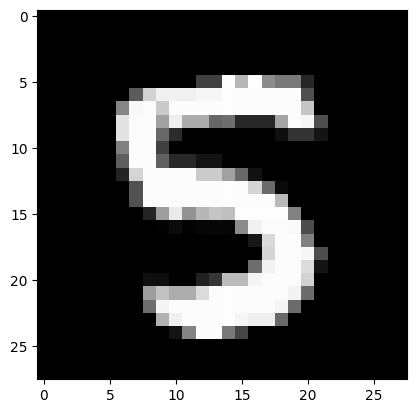

5


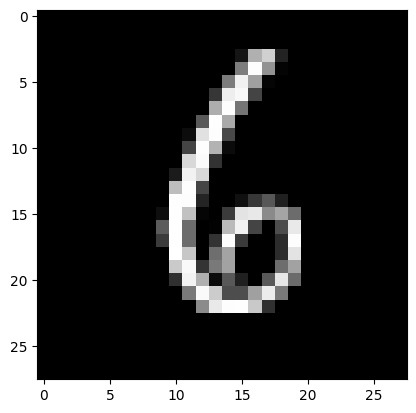

6


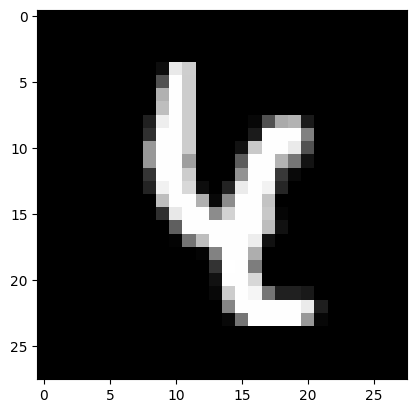

4


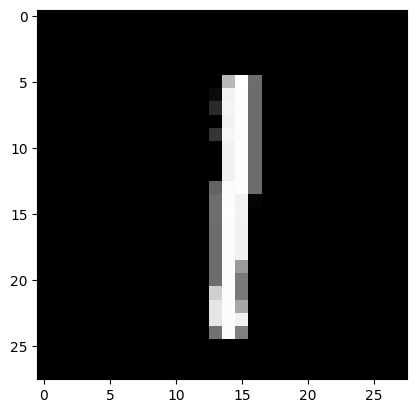

1


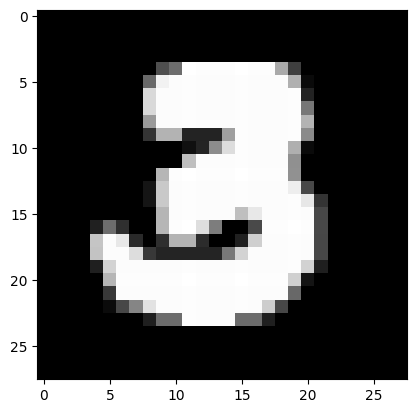

3


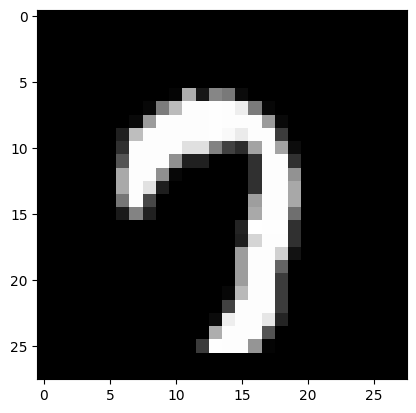

7


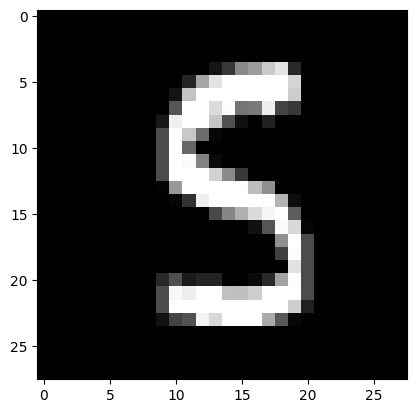

5


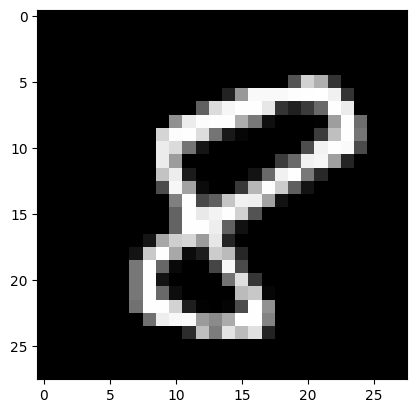

8


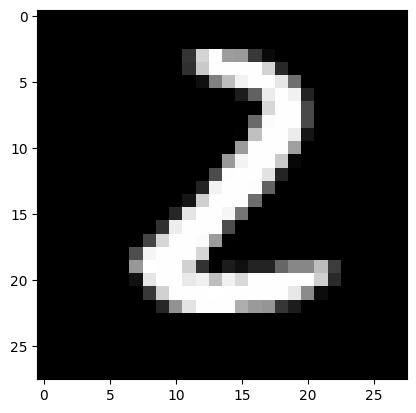

2


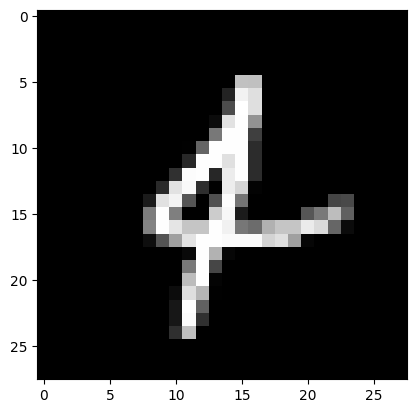

1


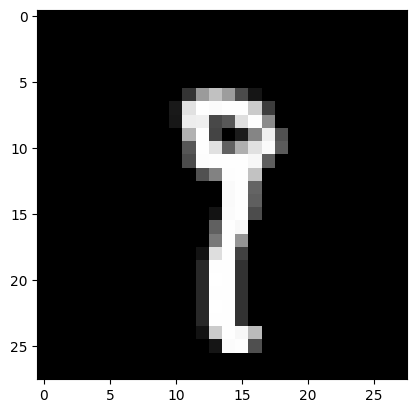

1


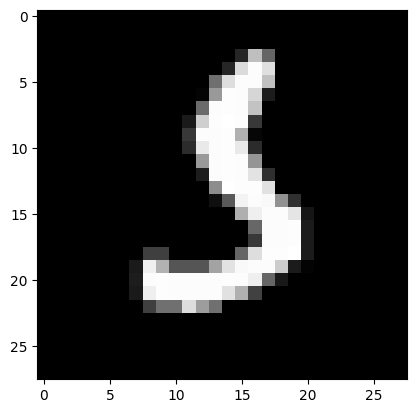

3


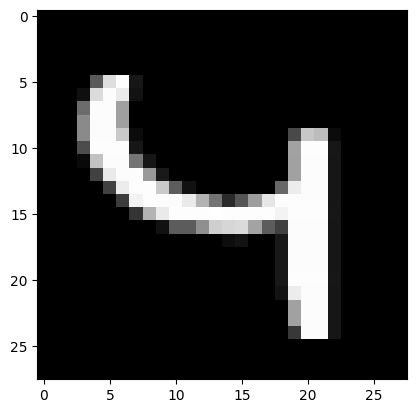

4


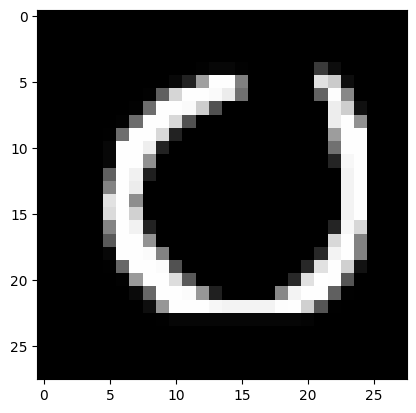

0


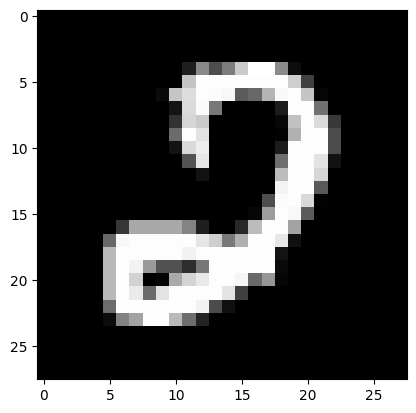

2


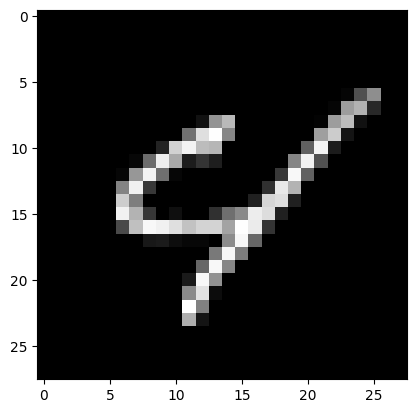

4


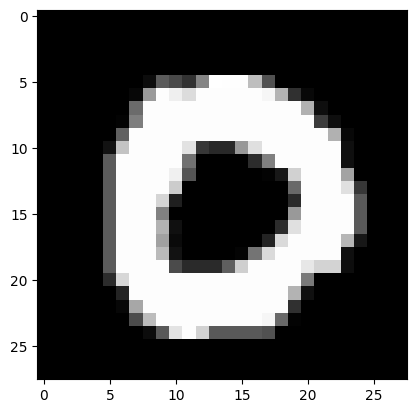

0


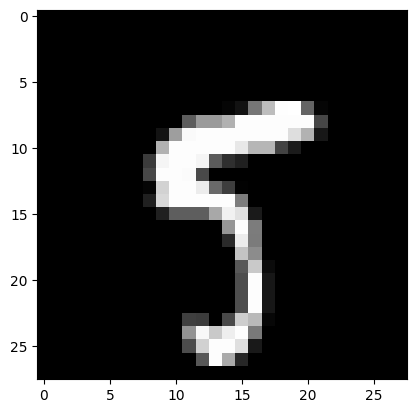

5


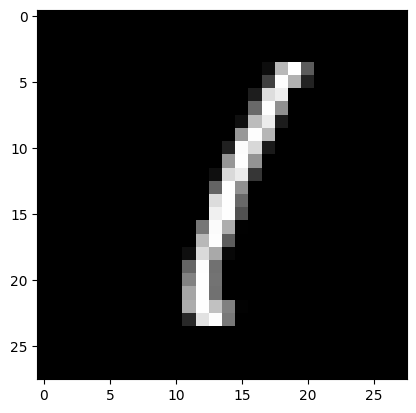

1


In [341]:
for i in range(0,499,20):
    plt.imshow(test_images1[i], cmap='gray')
    plt.show()
    print(out[0,i])
